In [55]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

import pandas as pd

In [86]:
# 와인 데이터 읽어 들이기
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [87]:
# 데이터프레임에 담긴 설명변수 출력
pd.DataFrame(wine.data, columns=wine.feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [88]:
# 목적변수 데이터 출력
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [89]:
# 설명변수와 목적변수를 변수에 대입
wine_data = wine.data[0:130]
wine_target = wine.target[0:130]

In [90]:
# 데이터 집합을 훈련 데이터와 테스트 데이터로 분할
train_X, test_X, train_Y, test_Y = train_test_split(wine_data, wine_target, test_size = 0.2)

# 데이터 건수 확인
print(len(train_X))
print(len(test_X))

104
26


In [91]:
# 훈련 데이터 텐서 변환
train_X = torch.from_numpy(train_X).float()
train_Y = torch.from_numpy(train_Y).long()

# 테스트 데이터 텐서 변환
test_X = torch.from_numpy(test_X).float()
test_Y = torch.from_numpy(test_Y).long()

# 텐서로 변환한 데이터 건수 확인
print(train_X.shape)
print(train_Y.shape)

torch.Size([104, 13])
torch.Size([104])


In [92]:
# 설명변수와 목적변수의 텐서를 합침
train= TensorDataset(train_X, train_Y)

# 텐서의 첫 번째 데이터 내용 확인
print(train[0])

# 미니배치로 분할
train_loader = DataLoader(train, batch_size =16, shuffle = True)

(tensor([1.3900e+01, 1.6800e+00, 2.1200e+00, 1.6000e+01, 1.0100e+02, 3.1000e+00,
        3.3900e+00, 2.1000e-01, 2.1400e+00, 6.1000e+00, 9.1000e-01, 3.3300e+00,
        9.8500e+02]), tensor(0))


# 다층 퍼셉트론 실전활용(p.78~)

In [93]:
# 신경망 구성
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(13, 96)
        self.fc2 = nn.Linear(96, 96)
        self.fc3 = nn.Linear(96, 96)
        self.fc4 = nn.Linear(96, 96)
        self.fc5 = nn.Linear(96, 96)
        self.fc6 = nn.Linear(96, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        
        return F.log_softmax(x)
    
# 인스턴스 생성
model = Net()

In [94]:
# 오차함수 객체
criterion = nn.CrossEntropyLoss()

# 최적화를 담당할 객체
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 학습 시작
for epoch in range(300):
    total_loss = 0
    # 분할해 둔 데이터를 꺼내옴
    for train_x, train_y in train_loader:
        # 계산 그래프 구성
        train_X, train_Y = Variable(train_x), Variable(train_y)
        # 경사 초기화
        optimizer.zero_grad()
        # 순전파 계산
        output = model(train_x)
        # 오차 계산
        loss = criterion(output, train_y)
        # 역전파 계산
        loss.backward()
        # 가중치 업데이트
        optimizer.step()
        # 누적 오차 계산
        total_loss += loss.data
        
    # 50회 반복마다 누적 오차 출력
    if (epoch+1) % 50 == 0:
        print(epoch+1, total_loss)

<ipython-input-93-4c4375488819>:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


50 tensor(2.3817)
100 tensor(1.6963)
150 tensor(2.6809)
200 tensor(1.3894)
250 tensor(1.4940)
300 tensor(1.4436)


In [95]:
# 계산 그래프 구성
test_x, test_y = Variable(test_X), Variable(test_Y)
# 출력이 0 혹은 1이 되게 함
result = torch.max(model(test_x).data, 1)[1]
# 모형의 정확도 측정
accuracy = sum(test_y.data.numpy() == result.numpy()) / len(test_y.data.numpy())

# 모형의 정확도 출력
accuracy

<ipython-input-93-4c4375488819>:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


0.9230769230769231

In [66]:
#신경망 구성까지 하고나서!!

In [96]:
#ptTYorch 라이브러리 임포트
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as potim
from torch.utils.data import DataLoader, TensorDataset

In [97]:
#sckit-learn 라이브러리 임포트
from sklearn.datasets import load_digits
from sklearn import datasets, model_selection

# pandas 라이브러리 임포트
import pandas as pd

# matplotlib 라이브러리 임포트
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline # 이미지를 노트북 안에 출력하도록 함

UsageError: unrecognized arguments: # 이미지를 노트북 안에 출력하도록 함


In [115]:
# MNIST 데이터를 읽어 들인 다음, 화면에 출력
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', data_home = './data/' )
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [116]:
# 설명ㅇ변수를 정규화하고 변수에 대입하고 화면에 출력
mnist_data = mnist.data / 255

# 데이터프레임 객체로 변환하고 화면에 출력
pd.DataFrame(mnist_data)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


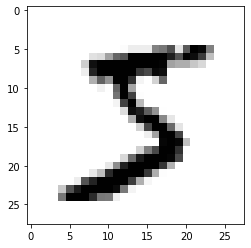

In [124]:
# 1번째 이미지를 화면에 출력
plt.imshow(mnist_data[0].reshape(28,28), cmap = cm.gray_r)
plt.show()

In [119]:
# 목적변수를 변수에 할당하고 데이터를 화면에 출력
mnist_label = mnist.target
mnist_label

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [125]:
import numpy as np
mnist_label = np.array(mnist_label, dtype = int)
mnist_label

array([5, 0, 4, ..., 4, 5, 6])

In [146]:
# 훈련 데이터 건수
train_size = 5000
# 테스트 데이터 건수
test_size = 500

# 데이터 집합을 훈련 데이터와 테스트 데이터로 분할
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(mnist_data, mnist_label, train_size = train_size, test_size = test_size)

In [110]:
####추가

In [111]:
# 데이터 타입 확인
print(type(train_X))
print(type(train_Y))####추가

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [112]:
####추가

In [121]:
#string 객체 형태로 되어 있는 Y값을 float으로 형변환 시켜주어야 한다.
import numpy as np
train_Y = np.array(train_Y, dtype= int)
test_Y = np.array(test_Y, dtype= int)

In [105]:
print(type(test_X))
print(type(test_Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


텐서생성

In [ ]:
#책이랑 약간 다름

In [129]:
torch.from_numpy(train_X).float()

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [141]:
trainx =torch.from_numpy(train_x).float()
trainx

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [142]:
# 훈련 데이터 텐서 변환
trian_X = torch.from_numpy(train_x).float()
train_Y = torch.from_numpy(train_y).long()

trian_X

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [135]:
train_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [147]:
# 훈련 데이터 텐서 변환
train_X = torch.from_numpy(train_X).float()
train_Y = torch.from_numpy(train_Y).long()

# 테스트 데이터 텐서 변환
test_X = torch.from_numpy(test_X).float()
test_Y = torch.from_numpy(test_Y).long()

# 변환된 텐서의 데이터 건수 확인
print(train_X.shape)
print(test_X.shape)

torch.Size([5000, 784])
torch.Size([500, 784])


In [148]:
# 설명변수와 목적변수의 텐서를 합침
train = TensorDataset(train_X, train_Y)

# 텐서의 첫번째 데이터 내용 확인
print(train[0])

# 미니배치로 분할
train_loader = DataLoader(train, batch_size = 100, shuffle = True)

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000,

신경망 구성

In [164]:
# 신경망 구성
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,256)
        self.fc3 = nn.Linear(256,256)
        self.fc4 = nn.Linear(256,128)
        self.fc5 = nn.Linear(128,128)
        self.fc6 = nn.Linear(128,10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.dropout(x, training =self.training)
        x = self.fc6(x)
        return F.log_softmax(x)

# 인스턴스 생성
model = Net()

모형 학습

In [ ]:
# 오차함수 객체
criterion = nn.CrossEntropyLoss()

# 최적화를 담당할 객체
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 학습 시작
for epoch in range(1000):
    total_loss = 0
    # 분할해 둔 데이터를 꺼내옴
    for train_x, train_y in train_loader:
        # 계산 그래프 구성
        train_x, train_y = Variable(train_x), Variable(train_y)
        # 경사 초기화
        optimizer.zero_grad()
        # 순전파 계산
        output = model(train_x)
        # 오차계산
        loss = criterion(output, train_y)
        # 역전파 계산
        loss.backward()
        # 가중치 업데이트
        optimizer.step()
        # 누적 오차 계산
        total_loss += loss.data
        
    # 100회 반복마다 누적 오차 출력
    if (epoch+1) % 100 == 0:
        print(epoch+1, total_loss)
        

<ipython-input-164-841a921d470e>:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


100 tensor(30.3507)
200 tensor(3.1903)
300 tensor(0.4654)
400 tensor(0.1795)
500 tensor(0.1164)
600 tensor(0.1026)
700 tensor(0.1091)


In [ ]:
# 계산 그래프 구성
test_x, test_y = Variable(test_X), Variable(test_Y)
# 출력이 0 혹은 1이 되게 함
result = torch.max(model(test_x).data, 1)[1]
# 모형의 정확도 측정
accuracy = sum(test_y.data.numpy() == result.numpy()) / len(test_y.data.numpy())
               
# 모형의 정확도 출력
accuracy

뉴스기사분류